In [129]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('/Users/aasthaprajapati/Desktop/Machine learning csv files/winequality-red.csv')

In [131]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [132]:
df = df[['citric acid', 'density','fixed acidity', ]]

In [133]:
normalised_df = (df - df.min())/(df.max()-df.min())

In [134]:
split_percentage = 0.75
msk = np.random.rand(len(df)) <= split_percentage

In [135]:
train = normalised_df[msk]
test = normalised_df[~msk]

In [136]:
x = train[['citric acid', 'density']].values
y = train[['fixed acidity']].values

In [152]:
x

array([[0.        , 0.56754772],
       [0.04      , 0.50881057],
       [0.56      , 0.58223201],
       ...,
       [0.1       , 0.37077827],
       [0.13      , 0.41629956],
       [0.12      , 0.39647577]])

In [155]:
x[[1]].shape

(1, 2)

In [156]:
index = np.random.randint(0,x.shape[0]-1)
x_s = x[[index]]
x_s.T

array([[0.11      ],
       [0.47209985]])

In [385]:
def stochastic_gradient_descent(x,y,w,b,learning_rate=0.001,iteration=1900 ):
    cost = []
    for i in range(iteration):
        index = np.random.randint(0,x.shape[0]-1)
        x_s = x[[index]]
        y_s = y[[index]]
       
        y_ = x_s.dot(w) + bias
        r = y_s - y_
    
        w_gradient = (-(1)*x_s.T.dot(r))/(len(y))
        b_gradient = (-(1)*np.sum(r))/(len(y))
    
        w = w - learning_rate*w_gradient
        b = b - learning_rate*b_gradient
    
        cost.append(np.sum((((y_s - y_) ** 2) / (2*len(y)))))
    
    return cost  

In [386]:
w = np.random.rand(2,1)

In [399]:
np.sign(w)

array([[1.],
       [1.]])

In [387]:
x_s

array([[0.11      , 0.47209985]])

In [388]:
bias = np.random.rand()

In [389]:
c = stochastic_gradient_descent(x,y,w,bias,0.01, 8000)

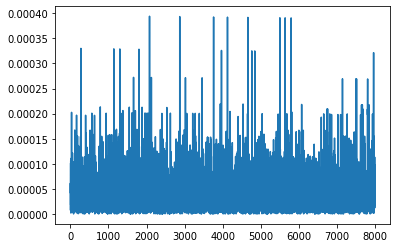

In [390]:
plt.plot(c)

In [391]:
c[0:10]

[4.274280459202653e-05,
 6.127882170811792e-05,
 2.1635847483074805e-05,
 7.333810286204976e-06,
 2.2188407377604427e-05,
 6.888371930540801e-05,
 0.00010130189270018035,
 1.7954452985414954e-05,
 0.00010614786150982244,
 3.442041876453371e-05]

In [392]:
y_pred = x.dot(w) + bias

In [393]:
np.abs(y-y_pred).mean()

0.2761708741547384

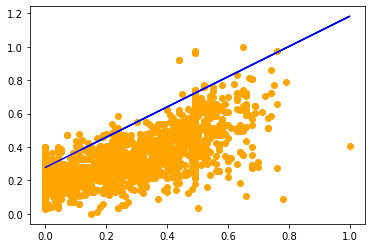

In [394]:
plt.scatter(normalised_df['citric acid'],normalised_df['fixed acidity'], color='orange')
plt.plot(x.T[0], x.T[0]*w[0]+bias, color='blue')